# Descriptive Statistics

As their name suggests, descriptive statistics describe a particular quality of the data they summarize. These statistics fall into two general categories: the **measures of central tendency** and the **measures of spread.**



## Measures of Central Tendency: 
Measures of central tendency describe the center position of a distribution for a data set.

1. Mean
2. Mode
3. Median

## Measures of Spread: 
The measures of spread (also known as dispersion) answer the question, “How much does my data vary?” . It describes the dispersion of data within the set

1. Standard Deviation
2. Variance

## Distributions:
1. Histogram
2. Probablity Distributions
3. Normal vs Non Normal
4. Skewness
5. Kurtosis

In addition, we will also cover 
- Central limit theorem
- C and Z score
- Confidence Score


In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [73]:
from IPython.display import display, clear_output

In [74]:
df = pd.read_csv('./human_body_temperature.csv')

In [75]:
df.head()

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


## 1. Mean ($\mu $)

The **statistical mean** refers to the mean or average that is used to derive the central tendency of the data in question. It is determined by adding all the data points in a population and then dividing the total by the number of points. The resulting number is known as the mean or the average.. Because of how it's calculated, **the mean is suseptible to outliers.** 

$ \mu = \frac {\sum_{i=1}^{n}  x_i}{n} $

where $ x_i $ are the individual data points in the sample and n is the total number of items in the sample. 




In [76]:
df.shape

(130, 3)

In [77]:
df['temperature'].sum()/130

98.24923076923075

In [78]:
mean = df['temperature'].mean()
mean

98.24923076923078

## 2. Mode

The **statistical mode** refers to the most frequently occurring number found in a set of numbers. The mode is found by collecting and organizing data in order to count the frequency of each result. The result with the highest count of occurrences is the mode of the set, also referred to as the **modal value.**

In [79]:
df['temperature'].mode()

0    98.0
dtype: float64

## 3. Median

The mean may not be a fair representation of the data, because the average is easily influenced by outliers (very small or large values in the data set that are not typical). The median is another way to measure the center tendency of a numerical data set. Thus, the median is truly the middle of the data set.

To find the median, we first need to:
1. Reorganize our data set in ascending order. 
2. Find the value that coincides with the middle of the data set. If there are an even amount of items, then we take the average of the two values that would “surround” the middle. 

This value is the **Median.**



In [80]:
df['temperature'].sort_values()

125     96.3
39      96.4
11      96.7
105     96.7
95      96.8
42      96.9
106     97.0
85      97.1
93      97.1
49      97.1
43      97.2
123     97.2
18      97.2
109     97.3
46      97.4
65      97.4
47      97.4
78      97.4
66      97.4
124     97.5
82      97.5
59      97.6
104     97.6
79      97.6
31      97.6
71      97.7
120     97.7
126     97.7
117     97.8
90      97.8
       ...  
7       98.8
92      98.8
56      98.8
110     98.8
73      98.8
15      98.8
75      98.8
80      98.8
98      98.8
69      98.9
50      98.9
122     99.0
114     99.0
44      99.0
100     99.0
74      99.0
60      99.1
113     99.1
36      99.1
5       99.2
83      99.2
3       99.2
0       99.3
34      99.3
103     99.4
19      99.4
35      99.5
96      99.9
91     100.0
116    100.8
Name: temperature, Length: 130, dtype: float64

Always use the median when the distribution is skewed. You can use either the mean or the median when the population is symmetrical, because then they will give almost identical results.


In [81]:
df['temperature'].median()

98.3

# Measures of Spread


## 1. Standard Deviation ($ \sigma $ )
Standard deviation is a measure of how spread out data is around center of the distribution (the mean). 

$ {\sigma}=\sqrt{\frac{\sum_{i=1}^{n} (x_i -\mu)^2}{n}}$

Steps to caluclate the standard deviation:

1. Find the mean.
2. For each data point, find the square of its distance to the mean.
3. Sum the values from Step 2.
4. Divide by the number of data points.
5. Take the square root.





In [82]:
df['temperature'].std()

0.7331831580389454

## 2. Variance ($\sigma ^2 $ , Var(X) )

Variance is a measures how far a set of (random) numbers are spread out from their average value.

The variance of a random variable X is the expected value of the squared deviation from the mean of X, $ \mu = E[X]$ :

$ Var(X) = E[(X - \mu) ^2] $



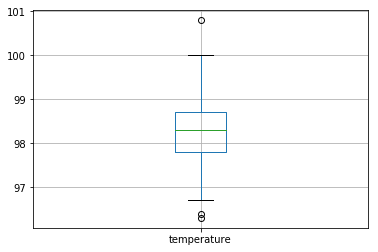

In [83]:
df.boxplot(column='temperature', sym='o', return_type='axes')

In Pandas, we can use describe function to get all this aggregate information:

In [84]:
df['temperature'].describe()

count    130.000000
mean      98.249231
std        0.733183
min       96.300000
25%       97.800000
50%       98.300000
75%       98.700000
max      100.800000
Name: temperature, dtype: float64

# Distributions

## 1. Histogram
A great way to get started exploring a single variable is with the histogram. A histogram divides the variable into bins, counts the data points in each bin, and shows the bins on the x-axis and the counts on the y-axis. 

In our case, the bins will be an interval of the human body temperature and the count will be the number of people within that  temperature interval. The **binwidth** is the most important parameter for a histogram and we should always try out a few different values of binwidth to select the best one for our data.

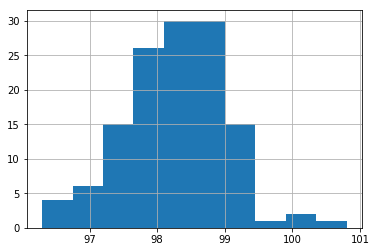

In [85]:
df['temperature'].hist()

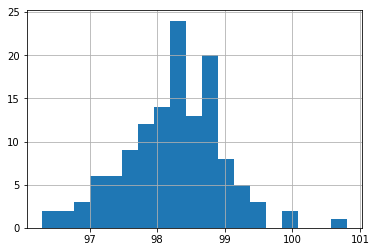

In [86]:
fig = plt.figure()
for i in range(10,20):
    df['temperature'].hist(bins=i)
    display(fig)
    clear_output(wait = True)
    plt.pause(1)

## 2. Probability Distribution

In probability theory and statistics, a **probability distribution** is a mathematical function that provides the probabilities of occurrence of different possible outcomes in an experiment. In more technical terms, the probability distribution is a description of a random phenomenon in terms of the probabilities of events. For instance, the random variable X is used to denote the outcome of human temperature measurements ("the experiment"), then the probability distribution of X looks like:



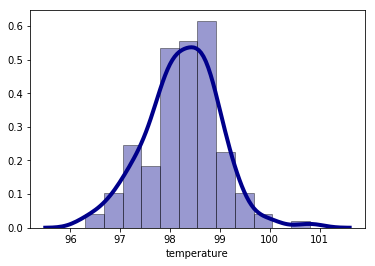

In [87]:
# Density Plot and Histogram of all human body temperature
sns.distplot(df['temperature'], hist=True, kde=True, 
             bins=12, color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

## 3. Normal vs Non Normal 

![alt text](Distributions.png)

The **normal** (or **Gaussian**) distribution is a very common continuous probability distribution. Normal/Gaussian distributions are important in statistics and are often used to represent real-valued random variables whose distributions are not known. 



## 4. Skewness
Skewness is a measure of symmetry, or more precisely, the lack of symmetry. A distribution, or data set, is symmetric if it looks the same to the left and right of the center point. 

## 5. Kurtosis
Kurtosis is a measure of whether the data are heavy-tailed or light-tailed relative to a normal distribution.

# Central Limit Theorem 

**Next Step :**
    Apply Descriptive Statistics to the Titanic Dataset. 